In [49]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy joypy scikit-learn

194988.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 16.0 MB/s eta 0:00:0000:0100:01m
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


Plot a heatmap of the cell scores.

In [90]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817612663.json'
#json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817614609.json'
# json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973719958.json'
json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_cell-scores_step-10000_thrshld_0.5_1686002319863.json'
# x_multiplier = 1000  # Set this value as the step size in the JSON file name
x_multiplier = 10000  # Set this value as the step size in the JSON file name

# Read data from JSON file
def read_data_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Read data from JSON file
data = read_data_from_json(json_file_path)

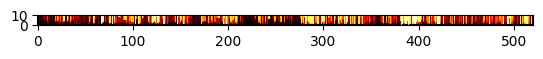

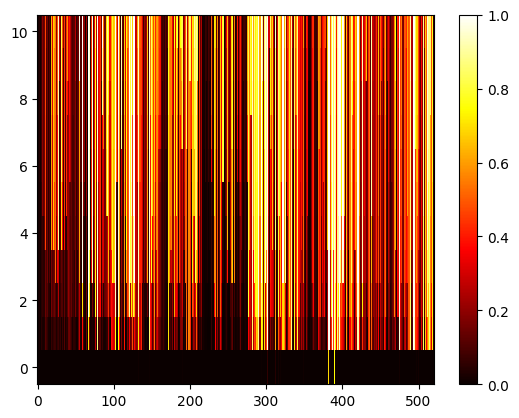

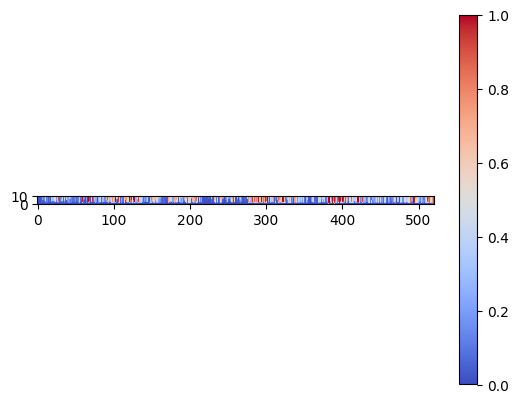

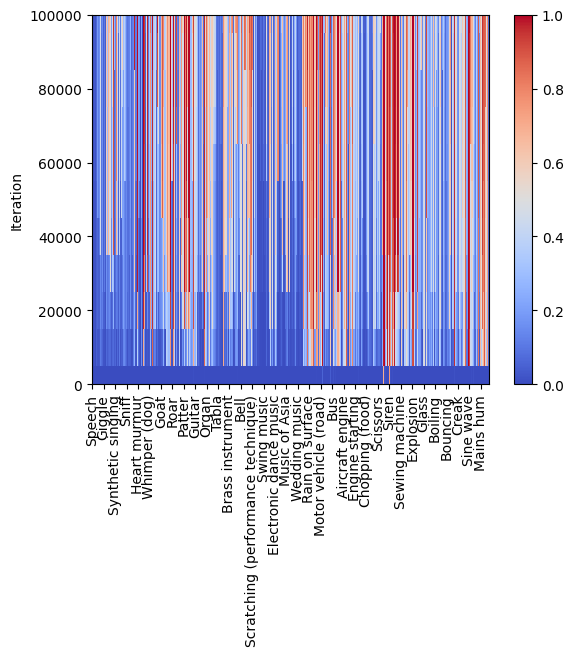

In [91]:
# Get the cellScores 2D array from the JSON data at evoRuns[0].iterations[0].cellScores
cellScores = data['evoRuns'][0]['iterations'][0]['cellScores']
classLabels = data['evoRuns'][0]['iterations'][0]['classLabels']

# Plot a heatmap of the cellScores 2D array
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(cellScores, cmap='hot', interpolation='nearest')
plt.gca().invert_yaxis()
plt.show()

# Plot a heatmap of the cellScores 2D array with a colorbar, with the y axis inverted
plt.imshow(cellScores, cmap='hot', interpolation='nearest', aspect='auto')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()


### Adjusting the colorscale
vmin = np.min(cellScores)
vmax = np.max(cellScores)

plt.imshow(cellScores, cmap='coolwarm', vmin=vmin, vmax=vmax, interpolation='nearest')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()


### Adjusting the height
vmin = np.min(cellScores)
vmax = np.max(cellScores)

# Calculate the extent of the heatmap
#extent = [0, len(cellScores[0]), 0, len(cellScores)]

# Create the heatmap with adjusted aspect ratio, multiply the y-axis values by a constant
plt.imshow(cellScores, cmap='coolwarm', vmin=vmin, vmax=vmax,  interpolation='nearest')
plt.gca().invert_yaxis()
plt.colorbar()

# Set the aspect ratio to 'auto'
plt.gca().set_aspect('auto')

# Set the x-axis tick positions and labels
# plt.xticks(range(len(classLabels)), classLabels)
# plt.xticks(range(len(classLabels)), classLabels, rotation='vertical')

# Define the step value for x-axis label display
step = 15  # Display every 2nd label, adjust as needed

# Set the x-axis tick positions and labels
plt.xticks(range(len(classLabels))[::step], classLabels[::step], rotation='vertical')


# # Define the constant by which the y-values need to be multiplied
# constant = x_multiplier
# # Get the current y-axis tick positions and labels
# yticks = plt.yticks()[0]
# yticklabels = [ytick * constant for ytick in yticks]
# # Set the scaled y-axis tick positions and labels
# plt.yticks(yticks, yticklabels)

# Define the constant by which the y-values need to be multiplied
constant = x_multiplier

# Get the current y-axis tick positions
yticks = plt.yticks()[0]

# Scale the y-values by the constant and format as integers
yticklabels = [int(ytick * constant) for ytick in yticks]

# Set the scaled y-axis tick positions and labels
plt.yticks(yticks, yticklabels)

# Set the y-axis limits without vertical padding
plt.ylim(yticks[1], yticks[-2])

# Set the y-axis label with vertical rotation
plt.ylabel('Iteration', rotation=90)

plt.show()



In [92]:
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_iris

In [99]:
# Create a data frame with the cellScores 2D array, where one column is the current entry number and the other colum is each entry in the cellScores (outer) 2D array

# concatenate the cellScores 2D array into a 1D array and convert each value with the float() function


# expanded_cellScores = np.concatenate(cellScores)
expanded_cellScores = [float(number) for sublist in cellScores for number in sublist]
# find the max value of the expanded_cellScores array
max_value = max(expanded_cellScores)
print(max_value)
cellScores_index_values = np.repeat(np.arange(len(cellScores)), len(cellScores[0]))

# print the first 500 values from the expanded_cellScores array
print(expanded_cellScores[:500])
# print the last 500 values from the expanded_cellScores array
#print(expanded_cellScores[-500:])


df = pd.DataFrame({'Iteration': cellScores_index_values, 'Score': expanded_cellScores})
df.set_index('Iteration', inplace=True)

# print(df)

1.0
[0.0011597414268180728, 6.0424561524996534e-05, 3.9781330997357145e-05, 4.300376895116642e-05, 2.0950090551252742e-09, 3.6172095860820264e-05, 0.000155775502207689, 1.0992637726303656e-05, 0.0003874506801366806, 1.9327484551467933e-05, 5.727503360475339e-09, 0.0006577856838703156, 3.9694154629899e-09, 5.512423740583472e-05, 1.2126717408023069e-09, 1.185074665954744e-06, 1.156384200839966e-06, 1.3504050322410421e-08, 8.819447998575924e-07, 0.0005486562149599195, 0.00010534610191825777, 0.00047285360051319003, 1.5938601336529246e-06, 1.5928599550463218e-09, 0.00017202783783432096, 2.26404608838493e-05, 1.975089389816276e-06, 1.9858240193570964e-05, 1.6218802556977607e-05, 5.714760391128948e-06, 0.00011320134944980964, 3.5146131267538294e-05, 8.504789761332177e-09, 2.1685054889530875e-05, 1.8294763037829398e-08, 0.00018782947154249996, 2.014896608670824e-06, 8.715499676126282e-12, 1.6951098302797618e-08, 5.0005048990442447e-08, 2.2858008888460013e-12, 4.018127219840295e-10, 4.97900991

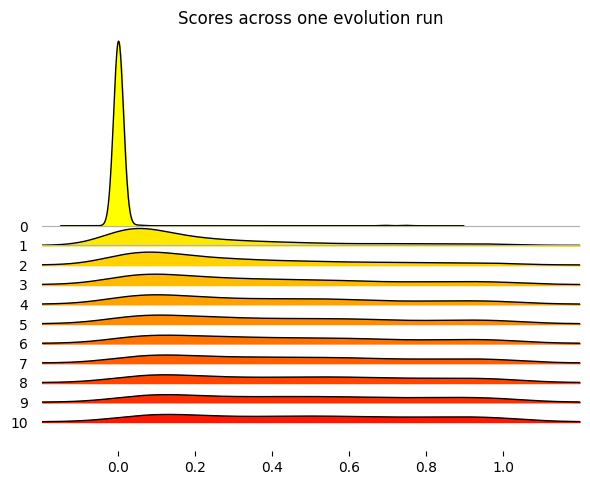

In [101]:
%matplotlib inline

labels=list(df.index.unique())
fig, axes = joypy.joyplot(df, by="Iteration", column="Score", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(6,5),
                          title="Scores across one evolution run",
                          colormap=cm.autumn_r, overlap=3)

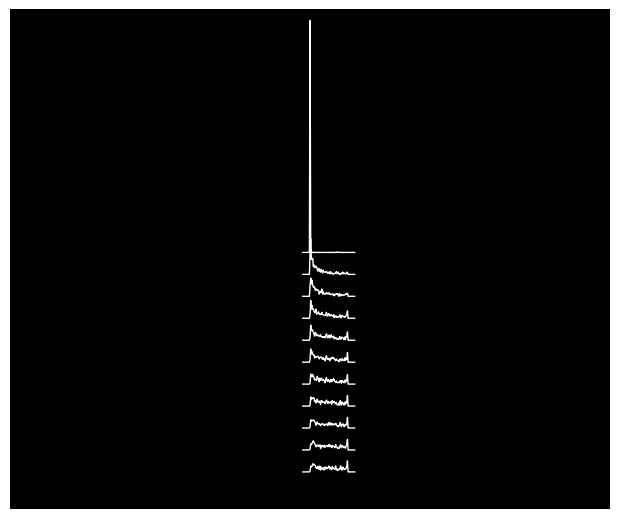

In [102]:
%matplotlib inline

fig, axes = joypy.joyplot(df,by="Iteration", column="Score", ylabels=False, xlabels=False, 
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=1.5, figsize=(6,5),kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    a.set_xlim([-8,8])     